In [1]:
import random, matplotlib.pyplot as plt
from math import sqrt
from IPython.display import clear_output
%matplotlib inline

In [2]:
cord = [[82, 76],
        [96, 44],
        [50, 5],
        [49, 8],
        [13, 7],
        [29, 89],
        [58, 30],
        [84, 39],
        [14, 24],
        [2, 39],
        [3, 82],
        [5, 10],
        [98, 52],
        [84, 25],
        [61, 59],
        [1, 65]]
len(cord)

16

In [3]:
def generateChrom():
    chrom = random.sample(range(1,16),15)
    chrom.insert(0,0)
    chrom.append(0)
    return chrom
def generatePopulation(n):
    population = []
    for i in range(n):
        population.append(generateChrom())
    return population

In [4]:
def fx(a,b):
    return sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))
def distance(chrom):
    total = 0
    for i in range(len(chrom)-1) :
        total += fx(cord[chrom[i]],cord[chrom[i+1]])
    return total

In [5]:
def crossover(ind1,ind2,pm):
    if random.random() <= pm :
        n = len(ind1)
        p1,p2 = [0]*n,[0]*n
        for i in range(1,n):
            p1[ind1[i]] = i
            p2[ind2[i]] = i
        point1 = random.randint(1, n )
        point2 = random.randint(1, n - 1)
        if point2 >= point1:
            point2 += 1
        else: 
            point1, point2 = point2, point1
        for i in range(point1,point2):
            temp1 = ind1[i]
            temp2 = ind2[i]
            ind1[i], ind1[p1[temp2]] = temp2, temp1
            ind2[i], ind2[p2[temp1]] = temp1, temp2
            p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
            p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
        ind1[0]=0
        ind2[0]=0
    return ind1,ind2

In [6]:
crossover([0, 1, 8, 11, 9, 4, 2, 6, 3, 14, 12, 7, 13, 15, 10, 5, 0],[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15, 0],1)

([0, 1, 2, 3, 9, 4, 8, 6, 11, 14, 12, 7, 13, 15, 10, 5, 0],
 [0, 1, 8, 11, 4, 5, 6, 7, 2, 9, 10, 3, 12, 13, 14, 15, 0])

In [7]:
def mutate(chrom,pc):
    if random.random()<=pc:
        chrom = generateChrom()
    return chrom
def mutatev2(chrom,pc):
    if random.random()<=pc:
        x1,x2 = random.choice(range(1,16)),random.choice(range(1,16))
        chrom[x1], chrom[x2] = chrom[x2], chrom[x1]
    return chrom

In [8]:
range(1,16)

range(1, 16)

In [9]:
def calcFitness(population):
    fitness = []
    for chrom in population:
        fitness.append(-distance(chrom))
    return fitness

### Tournament parent selection

In [10]:
def tournament(population,fitness,n):
    match = list(zip(population,fitness))
    candidate = random.sample(match,round(n/2))
    rank = sorted(candidate, key=lambda k: k[1], reverse=True)
    return rank[0][0],rank[1][0]

### Elitism

In [11]:
def elitism(population,fitness):
    max = round(len(population)/4)
    max = 2
    elite=[]
    match = list(zip(population,fitness))
    rank = sorted(match, key=lambda k: k[1], reverse=True)
    for i in range(max):
        elite.append(rank[i][0])
    return elite

In [12]:
n_population = 80
crossover_rate = 0.9
mutation_rate = 0.5
max_gen = 2000
output = True

gen  2000
([0, 12, 13, 2, 3, 9, 15, 10, 5, 1, 7, 6, 4, 11, 8, 14, 0], -510.79798721470246)
([0, 12, 13, 2, 3, 9, 15, 10, 5, 1, 7, 6, 4, 11, 8, 14, 0], -510.79798721470246)
([0, 12, 13, 11, 3, 9, 15, 10, 5, 1, 7, 6, 4, 2, 8, 14, 0], -567.1318014580695)
([0, 5, 2, 10, 1, 11, 8, 3, 6, 12, 13, 14, 15, 4, 7, 9, 0], -510.79798721470246)
([0, 12, 13, 2, 3, 9, 15, 10, 5, 1, 7, 6, 4, 11, 8, 14, 0], -645.2193755498732)
([0, 15, 11, 5, 12, 6, 10, 4, 3, 14, 7, 1, 2, 8, 9, 13, 0], -759.7870641309472)
([0, 4, 13, 2, 3, 9, 15, 10, 5, 1, 7, 6, 12, 11, 8, 14, 0], -510.79798721470246)
([0, 12, 13, 2, 3, 9, 15, 10, 5, 1, 7, 6, 4, 11, 8, 14, 0], -880.1264608066676)
([0, 12, 4, 2, 3, 9, 15, 10, 5, 1, 7, 6, 13, 11, 8, 14, 0], -510.79798721470246)
([0, 10, 4, 7, 11, 12, 2, 3, 13, 9, 8, 1, 15, 6, 14, 5, 0], -510.79798721470246)
([0, 12, 13, 2, 3, 6, 15, 10, 5, 1, 7, 9, 4, 11, 8, 14, 0], -510.79798721470246)
([0, 14, 2, 9, 13, 1, 12, 4, 11, 15, 7, 8, 6, 3, 10, 5, 0], -510.79798721470246)
([0, 12, 13, 2, 3, 9, 

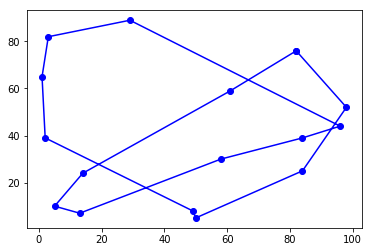

In [13]:
population = generatePopulation(n_population)
for gen in range(max_gen):    
    fitnesses = calcFitness(population)
    newPopulation = elitism(population,fitnesses)
    while len(newPopulation) < n_population:
#         parent1,*_ = tournament(population,fitnesses,n_population)
#         parent2,*_ = tournament(population,fitnesses,n_population)
        parent1, parent2 = tournament(population,fitnesses,n_population)
        child1,child2 = parent1.copy(),parent2.copy()
        child1,child2 = crossover(child1.copy(),child2.copy(),crossover_rate)
        child1 = mutatev2(child1,mutation_rate)
        child2 = mutate(child2,mutation_rate)
        newPopulation.extend([child1,child2])
#         fitnesses = calcFitness(newPopulation)
    if output:
        clear_output(wait=True)
        print("gen ",gen+1)
        print(*zip(newPopulation,fitnesses),sep="\n")
    population = newPopulation
n = 2
elite = list(zip(population[:n],fitnesses[:n]))
print("Result")
print(*elite,sep="\n")
best  = elite[0]
print("Best Solution",best,sep="\n")
res = best[0]
print(res)
plt.plot([cord[res[i]][0] for i in range(17)], [cord[res[i]][1] for i in range(17)], 'ob-')